In [26]:
from scipy import signal
import os
import spikeinterface as si
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# move to PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# config
data_conf_vivo, _ = get_config("vivo_marques", "c26").values()
RAW_PATH_vivo = data_conf_vivo["probe_wiring"]["output"]

data_conf_sili, _ = get_config("silico_neuropixels", "concatenated").values()
RAW_PATH_sili = data_conf_sili["probe_wiring"]["output"]

# parameters
DURATION = 10 * 60  # 10 min

SFREQ_vivo = 30000  # sampling frequency
SFREQ_sili = 40000  # sampling frequency

# Welch PSD
FILT_WINDOW = "hann"
FILT_WIND_SIZE_vivo = 30000  # same as sampling frequency to get 1hz;  5125*6   #2300  # tuned to get a freq. resol. of 0.1 Hz
FILT_WIND_OVERLAP_vivo = int(FILT_WIND_SIZE_vivo // 1.5)
FILT_WIND_SIZE_sili = 40000  # same as sampling frequency to get 1hz; 5125*6   #2300  # tuned to get a freq. resol. of 0.1 Hz
FILT_WIND_OVERLAP_sili = int(FILT_WIND_SIZE_sili // 1.5)

2024-05-14 14:40:15,480 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-14 14:40:15,502 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-05-14 14:40:15,503 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-14 14:40:15,579 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Load dataset

In [27]:
# load raw traces
RawVivo = si.load_extractor(RAW_PATH_vivo)

# load raw traces
RawSili = si.load_extractor(RAW_PATH_sili)

In [62]:
# choose sites from the same layer
site_layers_vivo = RawVivo.get_property("layers")
sites_vivo = np.where(site_layers_vivo == "L1")[0]

site_layers_sili = RawSili.get_property("layers")
sites_sili = np.where(site_layers_sili == "L1")[0]

#### (2m)Get traces from a few sites

In [55]:
# set site
SITE_VIVO_1 = 374
SITE_VIVO_2 = 375
SITE_VIVO_3 = 376
SITE_VIVO_4 = 377
SITE_VIVO_5 = 378

SITE_SILI_1 = 69
SITE_SILI_2 = 70
SITE_SILI_3 = 71
SITE_SILI_4 = 72
SITE_SILI_5 = 165

# in vivo
# trace 1
trace_vivo_1 = RawVivo.get_traces(
    channel_ids=[SITE_VIVO_1], end_frame=SFREQ_vivo * DURATION
)
trace_vivo_1 = np.array(trace_vivo_1).flatten()

# trace 2
trace_vivo_2 = RawVivo.get_traces(
    channel_ids=[SITE_VIVO_2], end_frame=SFREQ_vivo * DURATION
)
trace_vivo_2 = np.array(trace_vivo_2).flatten()

# trace 3
trace_vivo_3 = RawVivo.get_traces(
    channel_ids=[SITE_VIVO_3], end_frame=SFREQ_vivo * DURATION
)
trace_vivo_3 = np.array(trace_vivo_3).flatten()

# trace 4
trace_vivo_4 = RawVivo.get_traces(
    channel_ids=[SITE_VIVO_4], end_frame=SFREQ_vivo * DURATION
)
trace_vivo_4 = np.array(trace_vivo_4).flatten()

# trace 5
trace_vivo_5 = RawVivo.get_traces(
    channel_ids=[SITE_VIVO_5], end_frame=SFREQ_vivo * DURATION
)
trace_vivo_5 = np.array(trace_vivo_5).flatten()


# silico
# trace 1
trace_sili_1 = RawSili.get_traces(
    channel_ids=[SITE_SILI_1], end_frame=SFREQ_sili * DURATION
)
trace_sili_1 = np.array(trace_sili_1).flatten()

# trace 2
trace_sili_2 = RawSili.get_traces(
    channel_ids=[SITE_SILI_2], end_frame=SFREQ_sili * DURATION
)
trace_sili_2 = np.array(trace_sili_2).flatten()

# trace 3
trace_sili_3 = RawSili.get_traces(
    channel_ids=[SITE_SILI_3], end_frame=SFREQ_sili * DURATION
)
trace_sili_3 = np.array(trace_sili_3).flatten()

# trace 4
trace_sili_4 = RawSili.get_traces(
    channel_ids=[SITE_SILI_4], end_frame=SFREQ_sili * DURATION
)
trace_sili_4 = np.array(trace_sili_4).flatten()

# trace 5
trace_sili_5 = RawSili.get_traces(
    channel_ids=[SITE_SILI_5], end_frame=SFREQ_sili * DURATION
)
trace_sili_5 = np.array(trace_sili_5).flatten()

### Plot

Welch freq. resolution: 1.0
Welch freq. resolution: 1.0
The upper bound freq. resolution (Fourier's): 0.0016666666666666668


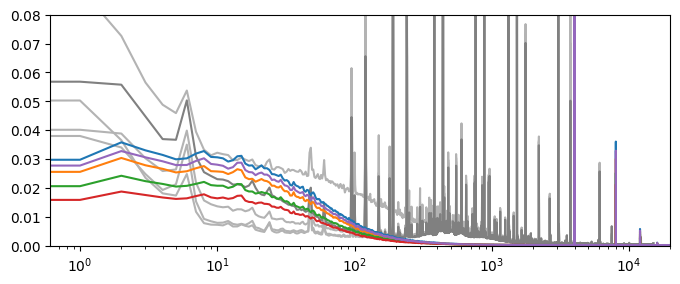

In [61]:
# plot
# VIVO ********************************
# resolution
freqs, powers_1 = signal.welch(
    trace_vivo_1,
    SFREQ_vivo,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_vivo,
    noverlap=FILT_WIND_OVERLAP_vivo,
)
freqs, powers_2 = signal.welch(
    trace_vivo_2,
    SFREQ_vivo,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_vivo,
    noverlap=FILT_WIND_OVERLAP_vivo,
)
freqs, powers_3 = signal.welch(
    trace_vivo_3,
    SFREQ_vivo,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_vivo,
    noverlap=FILT_WIND_OVERLAP_vivo,
)
freqs, powers_4 = signal.welch(
    trace_vivo_4,
    SFREQ_vivo,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_vivo,
    noverlap=FILT_WIND_OVERLAP_vivo,
)
freqs, powers_5 = signal.welch(
    trace_vivo_5,
    SFREQ_vivo,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_vivo,
    noverlap=FILT_WIND_OVERLAP_vivo,
)
print("Welch freq. resolution:", np.sort(freqs)[1] - np.sort(freqs)[0])

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(
    freqs,
    powers_1,
    color=[0.7, 0.7, 0.7],
    label="vivo",
)
ax.plot(
    freqs,
    powers_2,
    color=[0.7, 0.7, 0.7],
    label="vivo",
)
ax.plot(
    freqs,
    powers_3,
    color=[0.7, 0.7, 0.7],
    label="vivo",
)
ax.plot(
    freqs,
    powers_4,
    color=[0.7, 0.7, 0.7],
    label="vivo",
)
ax.plot(
    freqs,
    powers_5,
    color="gray",
    label="vivo",
)

# SILICO ********************************
# resolution
freqs, powers_1 = signal.welch(
    trace_sili_1,
    SFREQ_sili,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_sili,
    noverlap=FILT_WIND_OVERLAP_sili,
)
freqs, powers_2 = signal.welch(
    trace_sili_2,
    SFREQ_sili,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_sili,
    noverlap=FILT_WIND_OVERLAP_sili,
)
freqs, powers_3 = signal.welch(
    trace_sili_3,
    SFREQ_sili,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_sili,
    noverlap=FILT_WIND_OVERLAP_sili,
)
freqs, powers_4 = signal.welch(
    trace_sili_4,
    SFREQ_sili,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_sili,
    noverlap=FILT_WIND_OVERLAP_sili,
)
freqs, powers_5 = signal.welch(
    trace_sili_5,
    SFREQ_sili,
    window=FILT_WINDOW,
    nperseg=FILT_WIND_SIZE_sili,
    noverlap=FILT_WIND_OVERLAP_sili,
)
print("Welch freq. resolution:", np.sort(freqs)[1] - np.sort(freqs)[0])
print(
    "The upper bound freq. resolution (Fourier's):", SFREQ_sili / trace_sili_1.shape[0]
)


# plot
ax.plot(
    freqs,
    powers_1,
    color=[0.7, 0, 0],
    label="sili",
)
ax.plot(
    freqs,
    powers_2,
    color=[0.7, 0, 0],
    label="sili",
)
ax.plot(
    freqs,
    powers_3,
    color=[0.7, 0, 0],
    label="sili",
)
ax.plot(
    freqs,
    powers_4,
    color=[0.7, 0, 0],
    label="sili",
)
ax.plot(
    freqs,
    powers_5,
    color="r",
    label="sili",
)
ax.set_xscale("log")
ax.set_xlim([-1, SFREQ_sili / 2])
ax.set_ylim([0, 0.08])